<a href="https://colab.research.google.com/github/JDLiu/DigitalImageProcessAtNCHU/blob/main/Boundray_Extraction_%26_Region_Filling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#掛載Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


 環境初始化

In [ ]:
#載入框架
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage.filters import median_filter
import numpy as np
import os
import sys
%matplotlib inline

In [ ]:
#切換預設目錄
SYS_DIR = "/content/drive/My Drive/Colab Notebooks/DIP"
if not os.path.isdir(SYS_DIR):
    os.mkdir(SYS_DIR)
os.chdir(SYS_DIR)

In [ ]:
image_pt = plt.imread('Ga5Pe.jpg')
plt.imshow(image_pt)

In [ ]:
np.set_printoptions(threshold=sys.maxsize)
kernel = np.ones((3,3), np.uint8)
image_gry = cv2.cvtColor(image_pt, cv2.COLOR_BGR2GRAY)

#image will be padded with one zeros around
erosion = operation(image_gry, kernel, 1, "erosion")
dilation = operation(image_gry, kernel, 1, "dilation")

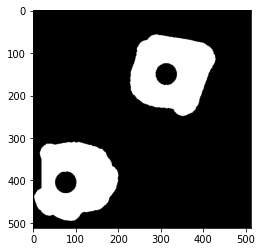

In [ ]:
plt.imshow(erosion,cmap='gray')

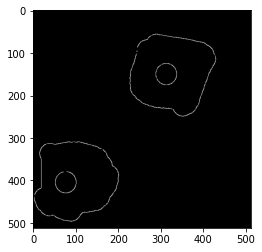

In [ ]:
boundary_ex=image_gry-erosion
plt.imshow(boundary_ex,cmap='gray')

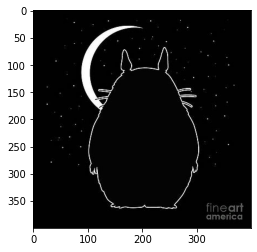

In [ ]:
image_dl = plt.imread('dl.jpg')
plt.imshow(image_dl,cmap='gray')

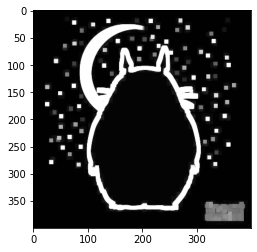

In [ ]:
kernel = np.ones((3,3), np.uint8)
dialotion = cv2.dilate(image_dl, kernel, iterations = 3)
plt.imshow(dialotion,cmap='gray')

In [ ]:
image_dl=np.logical_not(dialotion,image_dl)
#region_fill=np.logical_or(dialotion,image_dl)
plt.imshow(image_dl)

NameError: ignored

In [ ]:
def add_padding(image, padding, value):
    return cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=value)
def operation(image, kernel, padding=0, operation=None):
    if operation:
        img_operated = image.copy() #this will be the image

        padding_value = 0           # <<< ADDED
        if operation == "erosion":  # <<< ADDED
            padding_value = 1       # <<< ADDED
        padded = add_padding(image, padding, padding_value)  # <<< MODIFIED

        vertical_window = padded.shape[0] - kernel.shape[0] #final vertical window position
        horizontal_window = padded.shape[1] - kernel.shape[1] #final horizontal window position

        #start with vertical window at 0 position
        vertical_pos = 0

        #sliding the window vertically
        while vertical_pos <= vertical_window:
            horizontal_pos = 0

            #sliding the window horizontally
            while horizontal_pos <= horizontal_window:
                dilation_flag = False
                erosion_flag = False

                #gives the index position of the box
                for i in range(kernel.shape[0]):      # <<< MODIFIED
                    for j in range(kernel.shape[1]):  # <<< MODIFIED
                        if kernel[i][j] == 1:         # <<< ADDED
                            #First Case
                            if operation == "erosion":
                                #if we find 0, then break the second loop
                                if padded[vertical_pos+i][horizontal_pos+j] == 0:  # <<< MODIFIED
                                    erosion_flag = True                            # <<< MODIFIED
                                    break
                            #Second Case
                            elif operation == "dilation":
                                #if we find 1, then break the second loop
                                if padded[vertical_pos+i][horizontal_pos+j] == 1:  # <<< MODIFIED
                                    dilation_flag = True
                                    break
                            else:
                                return  "Operation not understood!"

                    #if opertion is erosion and there is no match found, break the first 'for' loop
                    if operation == "erosion" and erosion_flag:         # <<< MODIFIED
                        img_operated[vertical_pos, horizontal_pos] = 0  # <<< ADDED
                        break

                    #if operation is dilation and we find a match, then break the first 'for' loop 
                    if operation == "dilation" and dilation_flag:       # <<< FIXED
                        img_operated[vertical_pos, horizontal_pos] = 1
                        break

                # !!! Removed unnecessary checks here

                #increase the horizontal window position
                horizontal_pos += 1

            #increase the vertical window position
            vertical_pos += 1

        return img_operated

    return "Operation Required!"